# Project Proposal Data Scraping/Cleaning/CSV Files
Alex Mueggenberg and Sebastian Rios

In [30]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.chrome.service import Service 
from webdriver_manager.chrome import ChromeDriverManager 
import time
import random

In [31]:
import pandas as pd

In [32]:
premier_league_csv_df = pd.read_csv('/Users/alexmueggenberg/Downloads/Football Players Stats (Premier League 2021-2022).csv', encoding='ISO-8859-1', delimiter=',')




In [33]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time


driver = webdriver.Chrome()  
url = "https://www.premierleague.com/tables?co=1&se=418&ha=-1"
driver.get(url)

time.sleep(5)  


rows = driver.find_elements(By.CSS_SELECTOR, "tbody tr")
team_names = []
played = []
won = []
drawn = []
lost = []
goals_for = []
goals_against = []
goal_difference = []
points = []

for row in rows:
    cols = row.find_elements(By.TAG_NAME, "td")
    if len(cols) >= 10: 
        team_names.append(cols[1].text.strip())
        played.append(cols[2].text.strip())
        won.append(cols[3].text.strip())
        drawn.append(cols[4].text.strip())
        lost.append(cols[5].text.strip())
        goals_for.append(cols[6].text.strip())
        goals_against.append(cols[7].text.strip())
        goal_difference.append(cols[8].text.strip())
        points.append(cols[9].text.strip())
driver.quit()

df = pd.DataFrame({
    "Team": team_names,
    "Played": played,
    "Won": won,
    "Drawn": drawn,
    "Lost": lost,
    "Goals For": goals_for,
    "Goals Against": goals_against,
    "Goal Difference": goal_difference,
    "Points": points
})
df.to_csv("premier_league_table.csv", index=False)
print(df)


                 Team Played Won Drawn Lost Goals For Goals Against  \
0     Manchester City     38  29     6    3        99            26   
1           Liverpool     38  28     8    2        94            26   
2             Chelsea     38  21    11    6        76            33   
3   Tottenham Hotspur     38  22     5   11        69            40   
4             Arsenal     38  22     3   13        61            48   
..                ...    ...  ..   ...  ...       ...           ...   
67                                                                    
68                                                                    
69                                                                    
70                                                                    
71                                                                    

   Goal Difference Points  
0               73     93  
1               68     92  
2               43     74  
3               29     71  
4      

In [34]:
df.head(20)

,Team,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points
0,Manchester City,38,29,6,3,99,26,73,93
1,Liverpool,38,28,8,2,94,26,68,92
2,Chelsea,38,21,11,6,76,33,43,74
3,Tottenham Hotspur,38,22,5,11,69,40,29,71
4,Arsenal,38,22,3,13,61,48,13,69
5,Manchester United,38,16,10,12,57,57,0,58
6,West Ham United,38,16,8,14,60,51,9,56
7,Leicester City,38,14,10,14,62,59,3,52
8,Brighton And Hove Albion,38,12,15,11,42,44,-2,51
9,Wolverhampton Wanderers,38,15,6,17,38,43,-5,51


In [35]:
df['Team'] = df['Team'].astype(str).str.replace(r'\s+', ' ', regex=True).str.strip()
df_teams = df[df['Team'] != ""]

In [36]:
df_teams

,Team,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points
0,Manchester City,38,29,6,3,99,26,73,93
1,Liverpool,38,28,8,2,94,26,68,92
2,Chelsea,38,21,11,6,76,33,43,74
3,Tottenham Hotspur,38,22,5,11,69,40,29,71
4,Arsenal,38,22,3,13,61,48,13,69
5,Manchester United,38,16,10,12,57,57,0,58
6,West Ham United,38,16,8,14,60,51,9,56
7,Leicester City,38,14,10,14,62,59,3,52
8,Brighton And Hove Albion,38,12,15,11,42,44,-2,51
9,Wolverhampton Wanderers,38,15,6,17,38,43,-5,51


In [37]:
import pandas as pd

premier_league_csv_df = pd.read_csv("/Users/alexmueggenberg/Downloads/Football Players Stats (Premier League 2021-2022).csv", encoding='ISO-8859-1')  # or utf-8 if it works
teams_df = pd.read_csv("premier_league_table.csv")

print("Teams in player data:", premier_league_csv_df['Team'].unique())
print("Teams in team data:", teams_df['Team'].unique())

premier_league_csv_df['Team'] = premier_league_csv_df['Team'].str.strip()
teams_df['Team'] = teams_df['Team'].str.strip()

merged_df = pd.merge(premier_league_csv_df, teams_df, on='Team', how='left')

merged_df.to_csv("/Users/alexmueggenberg/Downloads/merged_player_team_stats.csv", index=False)
print("✅ Merged dataset saved as 'merged_player_team_stats.csv'")


Teams in player data: ['Arsenal' 'Aston Villa' 'Brentford' 'Brighton & Hove Albion' 'Burnley'
 'Chelsea' 'Crystal Palace' 'Everton' 'Leeds United' 'Leicester City'
 'Liverpool' 'Manchester City' 'Manchester United' 'Newcastle United'
 'Norwich City' 'Southampton' 'Tottenham Hotspur' 'Watford'
 'West Ham United' 'Wolverhampton Wanderers']
Teams in team data: ['Manchester City' 'Liverpool' 'Chelsea' 'Tottenham Hotspur' 'Arsenal'
 'Manchester United' 'West Ham United' 'Leicester City'
 'Brighton And Hove Albion' 'Wolverhampton Wanderers' 'Newcastle United'
 'Crystal Palace' 'Brentford' 'Aston Villa' 'Southampton' 'Everton'
 'Leeds United' 'Burnley' 'Watford' 'Norwich City' nan]
✅ Merged dataset saved as 'merged_player_team_stats.csv'


In [38]:
merged_df

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,npxG.1,npxG+xA.1,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.25,0.46,38.0,22.0,3.0,13.0,61.0,48.0,13.0,69.0
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.08,0.10,38.0,22.0,3.0,13.0,61.0,48.0,13.0,69.0
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.00,38.0,22.0,3.0,13.0,61.0,48.0,13.0,69.0
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.03,0.05,38.0,22.0,3.0,13.0,61.0,48.0,13.0,69.0
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.16,0.38,38.0,22.0,3.0,13.0,61.0,48.0,13.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Christian Marques,Wolverhampton Wanderers,ch SUI,DF,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,38.0,15.0,6.0,17.0,38.0,43.0,-5.0,51.0
687,Yerson Mosquera,Wolverhampton Wanderers,co COL,DF,20.0,0,0,NaN,NaN,NaN,...,NaN,NaN,38.0,15.0,6.0,17.0,38.0,43.0,-5.0,51.0
688,Louie Moulden,Wolverhampton Wanderers,eng ENG,GK,19.0,0,0,NaN,NaN,NaN,...,NaN,NaN,38.0,15.0,6.0,17.0,38.0,43.0,-5.0,51.0
689,Dion Sanderson,Wolverhampton Wanderers,eng ENG,DF,21.0,0,0,NaN,NaN,NaN,...,NaN,NaN,38.0,15.0,6.0,17.0,38.0,43.0,-5.0,51.0


In [39]:
print(merged_df.columns.tolist())


['Player', 'Team', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1', 'G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA', 'npxG+xA', 'xG.1', 'xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1', 'Played', 'Won', 'Drawn', 'Lost', 'Goals For', 'Goals Against', 'Goal Difference', 'Points']


In [40]:
# This data was scraped by Sebastian and converted into a csv file
finances = pd.read_csv('/Users/alexmueggenberg/Downloads/testing.csv')
finances = finances.drop(columns=['Unnamed: 0'])
display(finances)

,Player,Weekly Salary,Annual Salary,Position
0,Cristiano Ronaldo,"£ 515,000","£ 28,599,424",F
1,Kevin De Bruyne,"£ 400,000","£ 22,213,145",F
2,David de Gea,"£ 375,000","£ 20,824,824",K
3,Raphaël Varane,"£ 340,000","£ 18,881,173",D
4,Romelu Lukaku,"£ 325,000","£ 18,048,180",F
...,...,...,...,...
470,Dan Burn,"£ 15,000","£ 832,993",D
471,Zanka,"£ 15,000","£ 832,993",D
472,Ashley Fletcher,"£ 15,000","£ 832,993",F
473,Emmanuel Dennis,"£ 15,000","£ 832,993",F


In [41]:
top_100_players = finances.head(100)
display(top_100_players)

,Player,Weekly Salary,Annual Salary,Position
0,Cristiano Ronaldo,"£ 515,000","£ 28,599,424",F
1,Kevin De Bruyne,"£ 400,000","£ 22,213,145",F
2,David de Gea,"£ 375,000","£ 20,824,824",K
3,Raphaël Varane,"£ 340,000","£ 18,881,173",D
4,Romelu Lukaku,"£ 325,000","£ 18,048,180",F
...,...,...,...,...
95,Ederson,"£ 100,000","£ 5,553,286",K
96,Antonio Rüdiger,"£ 100,000","£ 5,553,286",D
97,Raúl Jiménez,"£ 100,000","£ 5,553,286",F
98,Sead Kolasinac,"£ 100,000","£ 5,553,286",D


In [151]:
merged_475 = pd.merge(finances, merged_df, on='Player', how='left')
display(merged_475)

,Player,Weekly Salary,Annual Salary,Position,Team,Nation,Pos,Age,MP,Starts,...,npxG.1,npxG+xA.1,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points
0,Cristiano Ronaldo,"£ 515,000","£ 28,599,424",F,Manchester United,pt POR,FW,36.0,30.0,27.0,...,0.52,0.64,38.0,16.0,10.0,12.0,57.0,57.0,0.0,58.0
1,Kevin De Bruyne,"£ 400,000","£ 22,213,145",F,Manchester City,be BEL,MF,30.0,30.0,25.0,...,0.26,0.65,38.0,29.0,6.0,3.0,99.0,26.0,73.0,93.0
2,David de Gea,"£ 375,000","£ 20,824,824",K,Manchester United,es ESP,GK,30.0,38.0,38.0,...,0.00,0.00,38.0,16.0,10.0,12.0,57.0,57.0,0.0,58.0
3,Raphaël Varane,"£ 340,000","£ 18,881,173",D,Manchester United,fr FRA,DF,28.0,22.0,20.0,...,0.04,0.05,38.0,16.0,10.0,12.0,57.0,57.0,0.0,58.0
4,Romelu Lukaku,"£ 325,000","£ 18,048,180",F,Chelsea,be BEL,FW,28.0,26.0,16.0,...,0.34,0.51,38.0,21.0,11.0,6.0,76.0,33.0,43.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Dan Burn,"£ 15,000","£ 832,993",D,Newcastle United,eng ENG,DF,29.0,16.0,16.0,...,0.03,0.04,38.0,13.0,10.0,15.0,44.0,62.0,-18.0,49.0
491,Zanka,"£ 15,000","£ 832,993",D,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,Ashley Fletcher,"£ 15,000","£ 832,993",F,Watford,eng ENG,FW,25.0,3.0,0.0,...,1.16,1.16,38.0,6.0,5.0,27.0,34.0,77.0,-43.0,23.0
493,Emmanuel Dennis,"£ 15,000","£ 832,993",F,Watford,ng NGA,"FW,MF",23.0,33.0,30.0,...,0.26,0.37,38.0,6.0,5.0,27.0,34.0,77.0,-43.0,23.0


In [125]:
merged_475.columns = merged_475.columns.str.strip()  # Remove leading/trailing spaces

In [155]:
# Strip any leading/trailing whitespace and remove '£' and ',' symbols
merged_475['Weekly Salary'] = merged_475['Weekly Salary'].str.strip().str.replace('£', '', regex=False).str.replace(',', '', regex=False)
merged_475['Annual Salary'] = merged_475['Annual Salary'].str.strip().str.replace('£', '', regex=False).str.replace(',', '', regex=False)

# Convert the columns to numeric values, setting invalid values to NaN
merged_475['Weekly Salary'] = pd.to_numeric(merged_475['Weekly Salary'], errors='coerce')
merged_475['Annual Salary'] = pd.to_numeric(merged_475['Annual Salary'], errors='coerce')

# Check the first few rows after conversion
print(merged_475[['Weekly Salary', 'Annual Salary']].head())


   Weekly Salary  Annual Salary
0         515000       28599424
1         400000       22213145
2         375000       20824824
3         340000       18881173
4         325000       18048180


In [165]:
dupes = merged_475[merged_475.duplicated(subset="Player", keep=False)]
dupes["performance_score"] = (
    dupes["Min"].fillna(0) +
    dupes["Gls"].fillna(0) * 100 +
    dupes["Ast"].fillna(0) * 50 +
    dupes["npxG+xA.1"].fillna(0) * 100
)


/var/folders/83/xfpf8mmd7w7g0r45m8pgc91r0000gn/T/ipykernel_2883/3008812740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupes["performance_score"] = (


In [169]:
dupes_best = dupes.sort_values("performance_score", ascending=False)\
                  .drop_duplicates(subset="Player", keep="first")
dupes_best

,Player,Weekly Salary,Annual Salary,Position,Team,Nation,Pos,Age,MP,Starts,...,npxG+xA.1,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,performance_score
262,Calum Chambers,50000,2776643,D,Aston Villa,eng ENG,DF,26.0,11.0,9.0,...,0.04,38.0,13.0,6.0,19.0,52.0,54.0,-2.0,45.0,935.0
116,Dele Alli,100000,5553286,F,Tottenham Hotspur,eng ENG,"MF,FW",25.0,10.0,8.0,...,0.21,38.0,22.0,5.0,11.0,69.0,40.0,29.0,71.0,778.0
254,Daniel James,50000,2776643,F,Leeds United,wls WAL,"FW,MF",23.0,32.0,29.0,...,0.31,38.0,9.0,11.0,18.0,42.0,79.0,-37.0,38.0,631.0
78,Donny van de Beek,120000,6663944,M,Everton,nl NED,MF,24.0,7.0,5.0,...,0.18,38.0,11.0,6.0,21.0,43.0,66.0,-23.0,39.0,601.0
372,Anwar El Ghazi,30962,1719383,F,Aston Villa,nl NED,"FW,MF",26.0,9.0,4.0,...,0.16,38.0,13.0,6.0,19.0,52.0,54.0,-2.0,45.0,552.0
135,Chris Wood,80000,4442629,F,Burnley,nz NZL,FW,29.0,17.0,17.0,...,0.31,38.0,7.0,14.0,17.0,34.0,53.0,-19.0,35.0,331.0
143,Moussa Sissoko,80000,4442629,M,Watford,fr FRA,MF,31.0,36.0,36.0,...,0.17,38.0,6.0,5.0,27.0,34.0,77.0,-43.0,23.0,267.0
119,Lucas Digne,90000,4997958,D,Aston Villa,fr FRA,DF,28.0,16.0,16.0,...,0.18,38.0,13.0,6.0,19.0,52.0,54.0,-2.0,45.0,218.0
359,Matt Targett,35000,1943650,D,Aston Villa,eng ENG,DF,25.0,17.0,17.0,...,0.17,38.0,13.0,6.0,19.0,52.0,54.0,-2.0,45.0,167.0
489,Dan Burn,15000,832993,D,Brighton & Hove Albion,eng ENG,DF,29.0,13.0,12.0,...,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0


In [173]:
merged_cleaned = merged_475[~merged_475["Player"].isin(dupes["Player"])]
merged_cleaned = pd.concat([merged_cleaned, dupes_best], ignore_index=True)
merged_cleaned

,Player,Weekly Salary,Annual Salary,Position,Team,Nation,Pos,Age,MP,Starts,...,npxG+xA.1,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,performance_score
0,Cristiano Ronaldo,515000,28599424,F,Manchester United,pt POR,FW,36.0,30.0,27.0,...,0.64,38.0,16.0,10.0,12.0,57.0,57.0,0.0,58.0,NaN
1,Kevin De Bruyne,400000,22213145,F,Manchester City,be BEL,MF,30.0,30.0,25.0,...,0.65,38.0,29.0,6.0,3.0,99.0,26.0,73.0,93.0,NaN
2,David de Gea,375000,20824824,K,Manchester United,es ESP,GK,30.0,38.0,38.0,...,0.00,38.0,16.0,10.0,12.0,57.0,57.0,0.0,58.0,NaN
3,Raphaël Varane,340000,18881173,D,Manchester United,fr FRA,DF,28.0,22.0,20.0,...,0.05,38.0,16.0,10.0,12.0,57.0,57.0,0.0,58.0,NaN
4,Romelu Lukaku,325000,18048180,F,Chelsea,be BEL,FW,28.0,26.0,16.0,...,0.51,38.0,21.0,11.0,6.0,76.0,33.0,43.0,74.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Lucas Digne,90000,4997958,D,Aston Villa,fr FRA,DF,28.0,16.0,16.0,...,0.18,38.0,13.0,6.0,19.0,52.0,54.0,-2.0,45.0,218.0
463,Matt Targett,35000,1943650,D,Aston Villa,eng ENG,DF,25.0,17.0,17.0,...,0.17,38.0,13.0,6.0,19.0,52.0,54.0,-2.0,45.0,167.0
464,Dan Burn,15000,832993,D,Brighton & Hove Albion,eng ENG,DF,29.0,13.0,12.0,...,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0
465,Kurt Zouma,125000,6941608,D,West Ham United,fr FRA,DF,26.0,24.0,24.0,...,0.04,38.0,16.0,8.0,14.0,60.0,51.0,9.0,56.0,104.0


In [179]:
# We decided to create a performance score column for the purpose of further analysis in regarding how well the players preform 
#in an offessive manner. This takes into an account goals, assist, non penalty goals, expected assists, yellow and red cards. 
#The variables are marked and weighted according to importance with negative variables substracting to overall performance.
merged_cleaned['Performance Score'] = (
    merged_cleaned['Gls'] * 4 +
    merged_cleaned['Ast'] * 3 +
    merged_cleaned['npxG'] * 2 +
    merged_cleaned['xA'] * 2 -
    merged_cleaned['CrdY'] * 1 -
    merged_cleaned['CrdR'] * 3
)
merged_cleaned = merged_cleaned.drop('performance_score', axis =1)
display(merged_cleaned)

,Player,Weekly Salary,Annual Salary,Position,Team,Nation,Pos,Age,MP,Starts,...,npxG+xA.1,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Performance Score
0,Cristiano Ronaldo,515000,28599424,F,Manchester United,pt POR,FW,36.0,30.0,27.0,...,0.64,38.0,16.0,10.0,12.0,57.0,57.0,0.0,58.0,107.6
1,Kevin De Bruyne,400000,22213145,F,Manchester City,be BEL,MF,30.0,30.0,25.0,...,0.65,38.0,29.0,6.0,3.0,99.0,26.0,73.0,93.0,113.8
2,David de Gea,375000,20824824,K,Manchester United,es ESP,GK,30.0,38.0,38.0,...,0.00,38.0,16.0,10.0,12.0,57.0,57.0,0.0,58.0,0.0
3,Raphaël Varane,340000,18881173,D,Manchester United,fr FRA,DF,28.0,22.0,20.0,...,0.05,38.0,16.0,10.0,12.0,57.0,57.0,0.0,58.0,9.0
4,Romelu Lukaku,325000,18048180,F,Chelsea,be BEL,FW,28.0,26.0,16.0,...,0.51,38.0,21.0,11.0,6.0,76.0,33.0,43.0,74.0,49.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Lucas Digne,90000,4997958,D,Aston Villa,fr FRA,DF,28.0,16.0,16.0,...,0.18,38.0,13.0,6.0,19.0,52.0,54.0,-2.0,45.0,15.2
463,Matt Targett,35000,1943650,D,Aston Villa,eng ENG,DF,25.0,17.0,17.0,...,0.17,38.0,13.0,6.0,19.0,52.0,54.0,-2.0,45.0,10.4
464,Dan Burn,15000,832993,D,Brighton & Hove Albion,eng ENG,DF,29.0,13.0,12.0,...,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6
465,Kurt Zouma,125000,6941608,D,West Ham United,fr FRA,DF,26.0,24.0,24.0,...,0.04,38.0,16.0,8.0,14.0,60.0,51.0,9.0,56.0,4.8


In [230]:
print(merged_cleaned.columns.tolist())


['Player', 'Weekly Salary', 'Annual Salary', 'Position', 'Team', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1', 'G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA', 'npxG+xA', 'xG.1', 'xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1', 'Played', 'Won', 'Drawn', 'Lost', 'Goals For', 'Goals Against', 'Goal Difference', 'Points', 'Performance Score']


# Project Check - In 

### Univariate Analysis
Do top-paid players justify their wages with top performance?:
Univariate Analysis: Starting with Salary distribution and Goals scored distribution

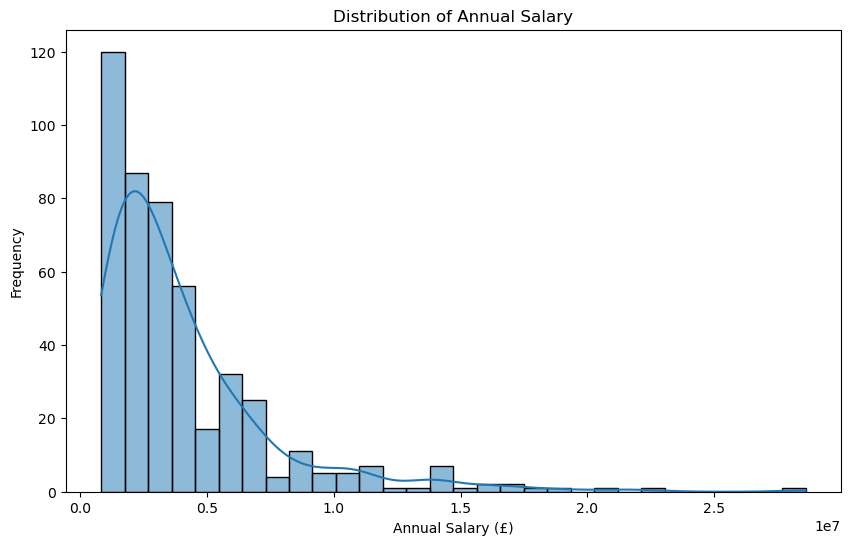

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for Annual Salary
plt.figure(figsize=(10, 6))
sns.histplot(merged_cleaned['Annual Salary'], bins=30, kde=True)
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary (£)')
plt.ylabel('Frequency')
plt.show()

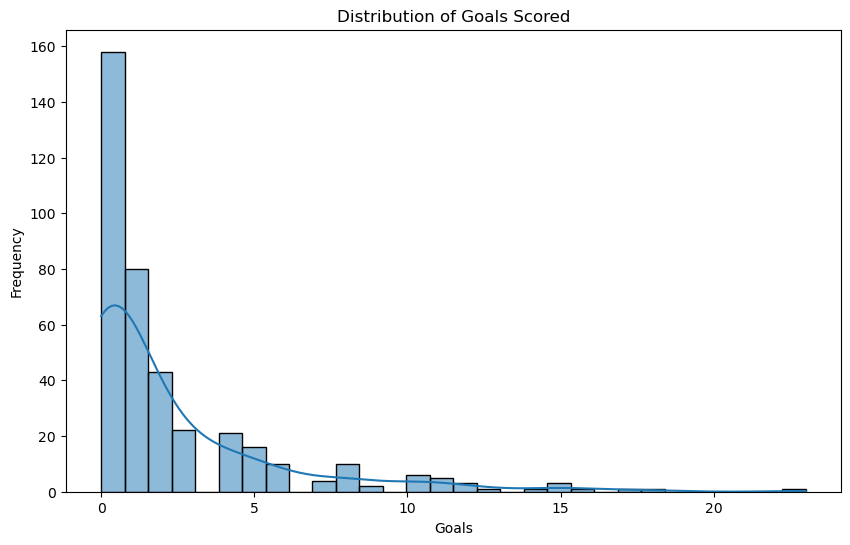

In [208]:
# Plot histogram for Goals (Gls)
plt.figure(figsize=(10, 6))
sns.histplot(merged_cleaned['Gls'], bins=30, kde=True)
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis
The scatter plot visually explores whether higher-paid players are performing better.
The correlation coefficient displays the strength and direction of the relationship:

Near 1 = strong positive correlation,
Near 0 = no linear correlation,
Near -1 = strong negative correlation

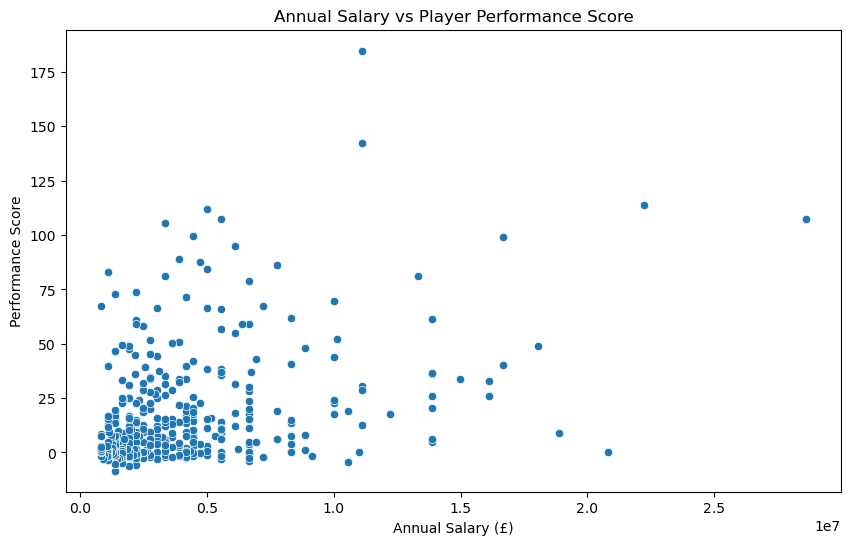

Correlation between Salary and Performance Score: 0.3735834294083284


In [212]:
# Scatter plot: Annual Salary vs Performance Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_cleaned, x='Annual Salary', y='Performance Score')
plt.title('Annual Salary vs Player Performance Score')
plt.xlabel('Annual Salary (£)')
plt.ylabel('Performance Score')
plt.show()

# Correlation between salary and performance
salary_perf_corr = merged_cleaned[['Annual Salary', 'Performance Score']].corr()
print(f"Correlation between Salary and Performance Score: {salary_perf_corr.iloc[0,1]}")

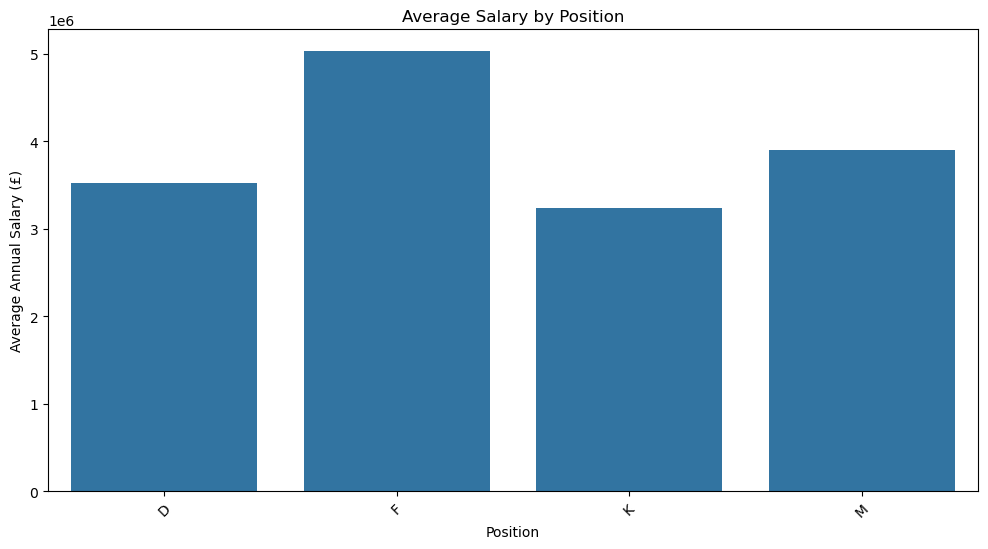

In [190]:
# Bar plot: Average Salary by Position
plt.figure(figsize=(12, 6))
avg_salary_by_position = merged_cleaned.groupby('Position')['Annual Salary'].mean().reset_index()
sns.barplot(x='Position', y='Annual Salary', data=avg_salary_by_position)
plt.title('Average Salary by Position')
plt.xlabel('Position')
plt.ylabel('Average Annual Salary (£)')
plt.xticks(rotation=45)
plt.show()

### Hypothesis Test: T-test for Salary vs Goals
Question: Do players who make above-median salary score more goals than those below?

Null Hypothesis (H0): Players who earn above the median salary do not score more goals than those earning below the median salary.

Alternative Hypothesis (H1): Players who earn above the median salary score more goals than those earning below the median salary

In [217]:
from scipy.stats import ttest_ind

median_salary = merged_cleaned['Annual Salary'].median()

# Create two groups: Above median salary and below median salary
above_median = merged_cleaned[merged_cleaned['Annual Salary'] > median_salary]
below_median = merged_cleaned[merged_cleaned['Annual Salary'] <= median_salary]

# Perform T-test for Goals (Gls) between the two groups
t_stat, p_value = ttest_ind(above_median['Gls'].dropna(), below_median['Gls'].dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Players earning above the median salary score significantly more goals.")
else:
    print("Fail to reject the null hypothesis: No significant difference in goals scored based on salary.")
    

T-statistic: 4.883327878093698
P-value: 1.5289008613138267e-06
Reject the null hypothesis: Players earning above the median salary score significantly more goals.


### Visualizations

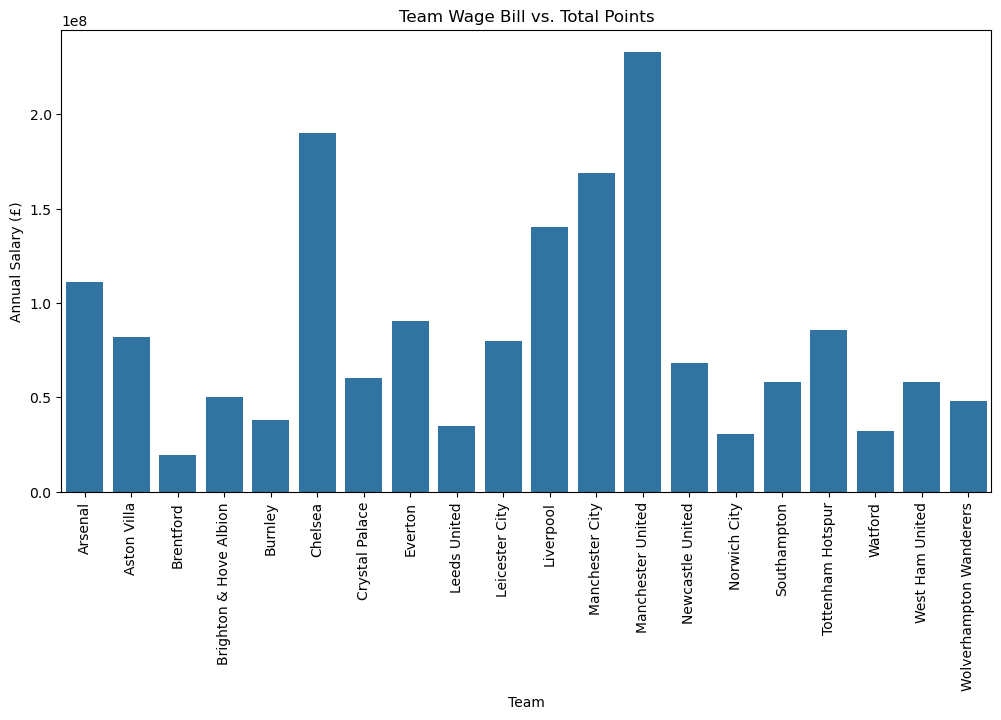

In [220]:
# Bar plot: Team wage bill vs. total points

# Calculate team wage bill (sum of all player salaries in each team)
team_salary = merged_cleaned.groupby('Team')['Annual Salary'].sum().reset_index()

# Calculate total points per team and merge
team_points = merged_cleaned.groupby('Team')['Points'].sum().reset_index()
team_data = pd.merge(team_salary, team_points, on='Team')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Annual Salary', data=team_data)
plt.title('Team Wage Bill vs. Total Points')
plt.xlabel('Team')
plt.ylabel('Annual Salary (£)')
plt.xticks(rotation=90)
plt.show()


In [228]:
average_wage_bill = team_data['Annual Salary'].mean()
print(average_wage_bill)

83990038.5


### Machine Learning: 1 Technique
Using Linear Regression to predict a performance metric like Goals (Gls) based on variables such as Salary, Minutes Played, and xG.

In [232]:
# Drop rows with any missing values in features or target
data = merged_cleaned[['Annual Salary', 'MP', 'xG', 'Gls']].dropna()

# Define X and y again based on cleaned data
X = data[['Annual Salary', 'MP', 'xG']]
y = data['Gls']

# Then continue as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.7849401867714976
R-squared: 0.8702931525450553


Interpretation of the Machine Learning techique
On average, the squared error between what the model predicts and reality is about 1.78 goals, the lower MSE goes the better.
The features picked (Annual Salary, MP, and xG) are able to explain 87% of the differences in players' real goal totals.